In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#F1 Data Analysis


##Read Files

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def read_csv_files(paths):
    data_frames = {}
    for path in paths:
        file_name = path.split('/')[-1].replace('.csv', '')  # Get the file name without the ".csv" extension
        data_frames[file_name] = pd.read_csv(path)  # Store the DataFrame in the dictionary
    return data_frames

files_path = [
    './Data/circuits.csv', './Data/constructor_results.csv', './Data/constructor_standings.csv',
    './Data/constructors.csv', './Data/driver_standings.csv', './Data/drivers.csv',
    './Data/lap_times.csv', './Data/pit_stops.csv', './Data/qualifying.csv',
    './Data/races.csv', './Data/results.csv', './Data/seasons.csv', './Data/sprint_results.csv'
]

data_frames = read_csv_files(files_path)
data_frames['drivers'].head(50)
print(data_frames['drivers'].isnull().sum())
df_races = data_frames['races']
df_results = data_frames['results']


driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64


###Tables Naming


In [4]:
df_races = data_frames['races']
df_results = data_frames['results']
df_drivers = data_frames['drivers']
df_constructors = data_frames['constructors']
df_constructor_results = data_frames['constructor_results']
df_constructor_standings = data_frames['constructor_standings']
df_driver_standings = data_frames['driver_standings']
df_lap_times = data_frames['lap_times']
df_pit_stops = data_frames['pit_stops']
df_qualifying = data_frames['qualifying']
df_seasons = data_frames['seasons']
df_sprint_results = data_frames['sprint_results']


###EDA



In [5]:
print(df_races.drop_duplicates(inplace=True))
print(df_results.drop_duplicates(inplace=True))
df_drivers.drop_duplicates(inplace=True)

None
None


In [6]:
df = data_frames['drivers']
df['code'] = df['code'].str.lower()

max_driver_data = df[(df['code'] == 'ham') | ((df['code'] == 'ver') & (df['nationality'] == 'Dutch'))]

print(max_driver_data)


     driverId       driverRef number code forename     surname         dob  \
0           1        hamilton     44  ham    Lewis    Hamilton  1985-01-07   
829       830  max_verstappen     33  ver      Max  Verstappen  1997-09-30   

    nationality                                          url  
0       British  http://en.wikipedia.org/wiki/Lewis_Hamilton  
829       Dutch  http://en.wikipedia.org/wiki/Max_Verstappen  


In [7]:
data_frames['drivers'].drop('url', axis=1, inplace=True)
data_frames['drivers']


,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44,ham,Lewis,Hamilton,1985-01-07,British
1,2,heidfeld,\N,hei,Nick,Heidfeld,1977-05-10,German
2,3,rosberg,6,ros,Nico,Rosberg,1985-06-27,German
3,4,alonso,14,alo,Fernando,Alonso,1981-07-29,Spanish
4,5,kovalainen,\N,kov,Heikki,Kovalainen,1981-10-19,Finnish
...,...,...,...,...,...,...,...,...
854,856,de_vries,21,dev,Nyck,de Vries,1995-02-06,Dutch
855,857,piastri,81,pia,Oscar,Piastri,2001-04-06,Australian
856,858,sargeant,2,sar,Logan,Sargeant,2000-12-31,American
857,859,lawson,40,law,Liam,Lawson,2002-02-11,New Zealander


In [8]:
data_frames['drivers'].drop('dob', axis=1, inplace=True)
data_frames['drivers'].drop('nationality', axis=1, inplace=True)
data_frames['drivers'].drop('forename', axis=1, inplace=True)
data_frames['drivers'].drop('surname', axis=1, inplace=True)
data_frames['drivers']

,driverId,driverRef,number,code
0,1,hamilton,44,ham
1,2,heidfeld,\N,hei
2,3,rosberg,6,ros
3,4,alonso,14,alo
4,5,kovalainen,\N,kov
...,...,...,...,...
854,856,de_vries,21,dev
855,857,piastri,81,pia
856,858,sargeant,2,sar
857,859,lawson,40,law


In [9]:
print(data_frames['drivers'].columns)

Index(['driverId', 'driverRef', 'number', 'code'], dtype='object')


get the column names from the tables


In [10]:
def get_column_names(data_frames):
    column_names = {}
    for table_name, df in data_frames.items():
        column_names[table_name] = df.columns.tolist()
    return column_names

def get_table_names(data_frames):
    return list(data_frames.keys())

column_names = get_column_names(data_frames)
print( f"Name of Columns in Tables:  {column_names}")

table_names = get_table_names(data_frames)
print( f"Tables:  {table_names}")

Name of Columns in Tables:  {'circuits': ['circuitId', 'circuitRef', 'name', 'location', 'country', 'lat', 'lng', 'alt', 'url'], 'constructor_results': ['constructorResultsId', 'raceId', 'constructorId', 'points', 'status'], 'constructor_standings': ['constructorStandingsId', 'raceId', 'constructorId', 'points', 'position', 'positionText', 'wins'], 'constructors': ['constructorId', 'constructorRef', 'name', 'nationality', 'url'], 'driver_standings': ['driverStandingsId', 'raceId', 'driverId', 'points', 'position', 'positionText', 'wins'], 'drivers': ['driverId', 'driverRef', 'number', 'code'], 'lap_times': ['raceId', 'driverId', 'lap', 'position', 'time', 'milliseconds'], 'pit_stops': ['raceId', 'driverId', 'stop', 'lap', 'time', 'duration', 'milliseconds'], 'qualifying': ['qualifyId', 'raceId', 'driverId', 'constructorId', 'number', 'position', 'q1', 'q2', 'q3'], 'races': ['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url', 'fp1_date', 'fp1_time', 'fp2_date', 'fp2_t

Exploratory DataAnalysis EDA


In [11]:
print(data_frames['drivers'].describe())
print(data_frames['drivers'].info())

         driverId
count  859.000000
mean   430.059371
std    248.213115
min      1.000000
25%    215.500000
50%    430.000000
75%    644.500000
max    860.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 859 entries, 0 to 858
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   driverId   859 non-null    int64 
 1   driverRef  859 non-null    object
 2   number     859 non-null    object
 3   code       859 non-null    object
dtypes: int64(1), object(3)
memory usage: 27.0+ KB
None


In [12]:
df_results = data_frames['results']
# df_results.info()

df_results.drop('fastestLapTime', axis=1, inplace=True)
df_results.drop('fastestLapSpeed', axis=1, inplace=True)
df_results.drop('fastestLap', axis=1, inplace=True)
df_results.drop('statusId', axis=1, inplace=True)
df_results.drop('milliseconds', axis=1, inplace=True)
df_results.drop('time', axis=1, inplace=True)
df_results


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,rank
0,1,18,1,1,22,1,1,1,1,10.0,58,2
1,2,18,2,2,3,5,2,2,2,8.0,58,3
2,3,18,3,3,7,7,3,3,3,6.0,58,5
3,4,18,4,4,5,11,4,4,4,5.0,58,7
4,5,18,5,1,23,3,5,5,5,4.0,58,1
...,...,...,...,...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,18,16,16,16,0.0,50,16
26515,26521,1132,815,9,11,0,17,17,17,0.0,50,6
26516,26522,1132,855,15,24,14,18,18,18,0.0,50,17
26517,26523,1132,847,131,63,1,\N,R,19,0.0,33,19


In [13]:
df_results.drop('grid', axis=1, inplace=True)
df_results.drop('positionText', axis=1, inplace=True)
df_results.drop('points', axis=1, inplace=True)
df_results.drop('laps', axis=1, inplace=True)
df_results


,resultId,raceId,driverId,constructorId,number,position,positionOrder,rank
0,1,18,1,1,22,1,1,2
1,2,18,2,2,3,2,2,3
2,3,18,3,3,7,3,3,5
3,4,18,4,4,5,4,4,7
4,5,18,5,1,23,5,5,1
...,...,...,...,...,...,...,...,...
26514,26520,1132,839,214,31,16,16,16
26515,26521,1132,815,9,11,17,17,6
26516,26522,1132,855,15,24,18,18,17
26517,26523,1132,847,131,63,\N,19,19


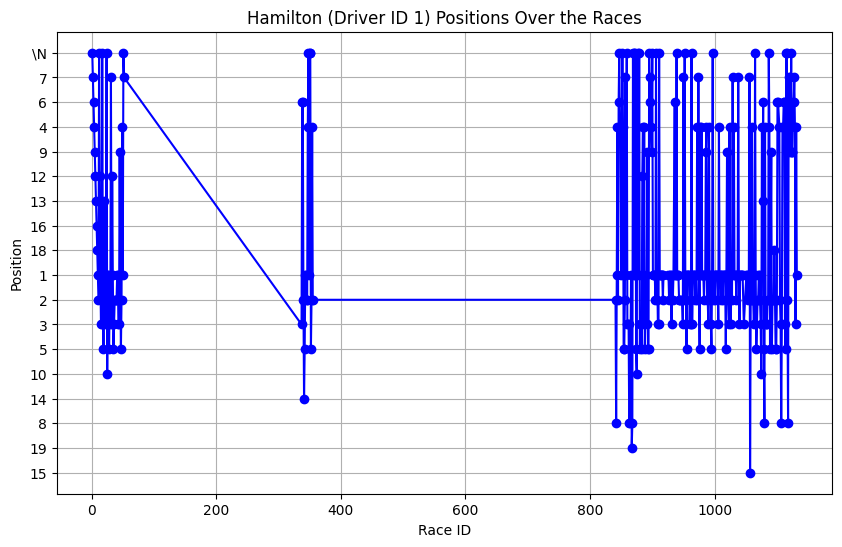

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

hamilton_driver_id = 1

hamilton_results = df_results[df_results['driverId'] == hamilton_driver_id]

hamilton_positions = hamilton_results[['raceId', 'position']]

hamilton_positions_sorted = hamilton_positions.sort_values(by='raceId')


plt.figure(figsize=(10, 6))
plt.plot(hamilton_positions_sorted['raceId'], hamilton_positions_sorted['position'], marker='o', linestyle='-', color='b')

plt.gca().invert_yaxis()

plt.title(f'Hamilton (Driver ID {hamilton_driver_id}) Positions Over the Races')
plt.xlabel('Race ID')
plt.ylabel('Position')
plt.grid(True)
plt.show()


Hamilton's Races and victories

In [15]:


def getDriverResults(data, driverId):
  driverResults = data[data['driverId'] == driverId]
  return driverResults

driverResults = getDriverResults(df_results, 830)
print(driverResults)

resultsCount = driverResults['resultId'].count()
print("Total Races",resultsCount)




       resultId  raceId  driverId  constructorId number position  \
22546     22550     926       830              5     33       \N   
22558     22562     927       830              5     33        7   
22588     22592     928       830              5     33       17   
22609     22613     929       830              5     33       \N   
22622     22626     930       830              5     33       11   
...         ...     ...       ...            ...    ...      ...   
26424     26430    1128       830              9      1        6   
26439     26445    1129       830              9      1        1   
26459     26465    1130       830              9      1        1   
26483     26489    1131       830              9      1        5   
26500     26506    1132       830              9      1        2   

       positionOrder rank  
22546             13   13  
22558              7    9  
22588             17   14  
22609             18   16  
22622             11   12  
...            

In [16]:
# print(driverResults['position'].unique())
print(driverResults['position'].sort_index(ascending=False).unique())

['2' '5' '1' '6' '\\N' '7' '3' '19' '9' '4' '8' '10' '11' '16' '12' '15'
 '17']


In [17]:
print(driverResults['position'].dtype)

object


In [18]:
# driverResults[driverResults['position'] == '1']
# Correct way to filter for rows where 'position' is '1'
victories = driverResults[driverResults['position'] == '1']
# print(victories)
print(f"Total victories : {victories['position'].count()}")

Total victories : 61


In [19]:
print(f"victories table: {victories.columns}")
print(f"Races table:  {df_races.columns}")

victories table: Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number', 'position',
       'positionOrder', 'rank'],
      dtype='object')
Races table:  Index(['raceId', 'year', 'round', 'circuitId', 'name', 'date', 'time', 'url',
       'fp1_date', 'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time'],
      dtype='object')


In [20]:
victories_with_races_names = victories.merge(df_races, on='raceId', how='left')[['raceId', 'year', 'name', 'position']]
print(victories_with_races_names)


    raceId  year                       name position
0      952  2016         Spanish Grand Prix        1
1      983  2017       Malaysian Grand Prix        1
2      986  2017         Mexican Grand Prix        1
3      997  2018        Austrian Grand Prix        1
4     1007  2018         Mexican Grand Prix        1
..     ...   ...                        ...      ...
56    1124  2024        Japanese Grand Prix        1
57    1125  2024         Chinese Grand Prix        1
58    1127  2024  Emilia Romagna Grand Prix        1
59    1129  2024        Canadian Grand Prix        1
60    1130  2024         Spanish Grand Prix        1

[61 rows x 4 columns]


In [21]:
import pandas as pd

# Function to get results for a specific driver
def get_driver_results(data, driver_id):
    """Fetch all race results for a specific driver."""
    return data[data['driverId'] == driver_id]

# Function to calculate total victories
def get_victory_count(data):
    """Count the total number of victories (position = 1) for a driver."""
    return data['raceId'].count()

# Function to calculate total races participated by a driver
def get_total_races(data, driver_id):
    """Get the total number of races participated by a driver."""
    return data[data['driverId'] == driver_id]['raceId'].count()

# Function to calculate win percentage
def calculate_win_percentage(total_races, victories):
    """Calculate the win percentage of a driver."""
    if total_races == 0:
        return 0.0
    percentage = (victories / total_races) * 100
    return round(percentage, 2)

# Main logic
def main():
    driver_id = int(input("Enter the driver ID: "))
    
    # Get driver results
    driver_results = get_driver_results(df_results, driver_id)

    # Filter victories (position = 1)
    victories = driver_results[driver_results['position'] == '1']
    
    # Merge victories with race details for more information
    victories_with_race_names = victories.merge(
        df_races, on='raceId', how='left'
    )[['raceId', 'year', 'name', 'position']]

    # Extract driver's information
    driver_info = df_drivers[df_drivers['driverId'] == driver_id]
    driver_name = driver_info['driverRef'].values[0]

    # Calculate total races and victories
    total_races = get_total_races(df_results, driver_id)
    victory_count = get_victory_count(victories_with_race_names)

    # Calculate win percentage
    win_percentage = calculate_win_percentage(total_races, victory_count)

    # Display results
    print(f"Driver: {driver_name} (ID: {driver_id})")
    print(f"Total Races Participated: {total_races}")
    print(f"Total Victories: {victory_count}")
    print(f"Win Percentage: {win_percentage}%")

# Run the program
if __name__ == "__main__":
    main()


Driver: hamilton (ID: 1)
Total Races Participated: 344
Total Victories: 104
Win Percentage: 30.23%


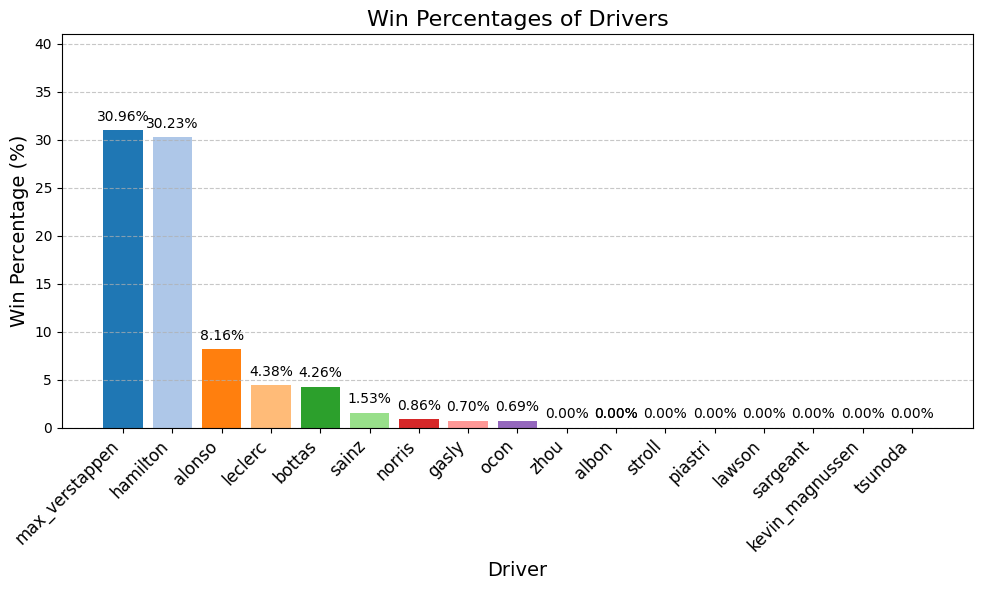

In [24]:
import pandas as pd
import matplotlib.pyplot as plt

# Function to get results for a specific driver
def get_driver_results(data, driver_id):
    """Fetch all race results for a specific driver."""
    return data[data['driverId'] == driver_id]

# Function to calculate total victories
def get_victory_count(data):
    """Count the total number of victories (position = 1) for a driver."""
    return data['raceId'].count()

# Function to calculate total races participated by a driver
def get_total_races(data, driver_id):
    """Get the total number of races participated by a driver."""
    return data[data['driverId'] == driver_id]['raceId'].count()

# Function to calculate win percentage
def calculate_win_percentage(total_races, victories):
    """Calculate the win percentage of a driver."""
    if total_races == 0:
        return 0.0
    percentage = (victories / total_races) * 100
    return round(percentage, 2)

# Function to calculate win percentage for a specific driver ID
def calculate_driver_win_percentage(data, races_data, driver_id):
    """Fetch the win percentage for a specific driver ID."""
    driver_results = get_driver_results(data, driver_id)
    victories = driver_results[driver_results['position'] == '1']
    total_races = get_total_races(data, driver_id)
    victory_count = get_victory_count(
        victories.merge(races_data, on='raceId', how='left')
    )
    return calculate_win_percentage(total_races, victory_count)

# Main logic to calculate win percentages for multiple Driver IDs
def main():
    # List of Driver IDs to compare
    driver_ids = [1, 830, 832,822,855,848, 844, 840, 4, 846, 848, 857, 859, 858, 825, 852, 839, 842]
    win_percentages = []

    for driver_id in driver_ids:
        win_percentage = calculate_driver_win_percentage(df_results, df_races, driver_id)
        driver_name = df_drivers[df_drivers['driverId'] == driver_id]['driverRef'].values[0]
        win_percentages.append((driver_name, win_percentage))

    # Sort drivers by win percentage (optional)
    win_percentages.sort(key=lambda x: x[1], reverse=True)

    # Prepare data for plotting
    driver_names = [item[0] for item in win_percentages]
    percentages = [item[1] for item in win_percentages]

    # Plotting the win percentages
    plt.figure(figsize=(10, 6))
    bars = plt.bar(driver_names, percentages, color=plt.cm.tab20.colors[:len(driver_names)])
    plt.title('Win Percentages of Drivers', fontsize=16)
    plt.xlabel('Driver', fontsize=14)
    plt.ylabel('Win Percentage (%)', fontsize=14)
    plt.ylim(0, max(percentages) + 10)  # Adjusting y-axis for clarity
    plt.xticks(rotation=45, ha='right', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Annotate bars with percentages
    for bar, percentage in zip(bars, percentages):
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2.0, height + 1, f'{percentage:.2f}%', ha='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Run the program
if __name__ == "__main__":
    main()


Latest Race in Data

In [22]:
df_races['date'] = pd.to_datetime(df_races['date'], errors='coerce')
latest_date = df_races['date'].max()

# Print the result
print(f"The latest date in the races dataset is: {latest_date}")


The latest date in the races dataset is: 2024-12-08 00:00:00


Droping.. Duplicates and Missing  Data

In [ ]:
print(df_races.drop_duplicates(inplace=True))
print(df_results.drop_duplicates(inplace=True))
print(df_drivers.drop_duplicates(inplace=True))
print(df_constructors.drop_duplicates(inplace=True))
print(df_constructor_results.drop_duplicates(inplace=True))
print(df_constructor_standings.drop_duplicates(inplace=True))
print(df_driver_standings.drop_duplicates(inplace=True))
print(df_lap_times.drop_duplicates(inplace=True))
print(df_pit_stops.drop_duplicates(inplace=True))
print(df_qualifying.drop_duplicates(inplace=True))



Predictive Imputation  (Regression)

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import numpy as np # Import numpy for numeric operations
import pandas as pd # Import pandas for data manipulation


def predictive_imputation(df, target_col, features):
    # Replace '\\N' with NaN to be handled by pandas
    df[target_col] = pd.to_numeric(df[target_col], errors='coerce')

    # Separate rows with missing and non-missing target values
    missing = df[df[target_col].isnull()]
    non_missing = df[df[target_col].notnull()]

    # Train a model on non-missing data
    X_train = non_missing[features]
    y_train = non_missing[target_col]
    model = RandomForestRegressor()
    model.fit(X_train, y_train)

    # Predict missing values
    X_missing = missing[features]
    df.loc[missing.index, target_col] = model.predict(X_missing)

    return df

# Example usage
# Assuming 'df_results' is the DataFrame you intend to use
df_results = predictive_imputation(df_results, target_col='position', features=['raceId', 'driverId'])


Forward/Backward Fill

In [25]:
# Forward Fill
df_filled_forward = df_results.ffill()
# Backward Fill
df_filled_backward = df_results.bfill()
# Example: Applying on a specific column
df['position'] = df_results['position'].ffill()
df['position']

0      1.0
1      2.0
2      3.0
3      4.0
4      5.0
      ... 
854    3.0
855    4.0
856    5.0
857    6.0
858    7.0
Name: position, Length: 859, dtype: float64

Interpolation

In [ ]:
# Linear Interpolation
# Check if 'position' column exists in df_races
if 'position' in df_results.columns:
    df['position'] = df_results['position'].interpolate(method='linear')
else:
    # Handle the case where 'position' column is not found
    # For example, you might want to create a new 'position' column
    # or raise a more informative error message
    print("Column 'position' not found in df_races.")

# Polynomial Interpolation (e.g., quadratic)
if 'position' in df_results.columns:
    df['position'] = df_results['position'].interpolate(method='polynomial', order=2)
else:
    print("Column 'position' not found in df_races.")

# Time Interpolation (for time-series data)
if 'position' in df_results.columns:
    df['position'] = df_results['position'].interpolate(method='time')
else:
    print("Column 'position' not found in df_races.")


In [ ]:
df_results.dropna(inplace=True)

Outliers Detection


In [26]:
# import numpy as np

# def detect_outliers_zscore(data, threshold=3):
#     z_scores = np.abs((data - np.mean(data)) / np.std(data))
#     outliers = np.where(z_scores > threshold)
#     return outliers

# # Example
# outliers = detect_outliers_zscore(df['position'], threshold=3)
# print("Outliers indices:", outliers)
print("max", df_results['position'].max())
print("min", df_results['position'].min())
print("mean",df_results['position'].mean())
print("median",df_results['position'].median())
print("mode",df_results['position'].mode())
print("std:",df_results['position'].std())



max 33.0
min 1.0
mean 8.12639381198386
median 8.0
mode 0    4.0
Name: position, dtype: float64
std: 4.287255123547758


z-score

In [27]:
from scipy.stats import zscore

# Calculate Z-scores for the 'position' column
df_results['z_score'] = zscore(df_results['position'])

# Find the rows where the Z-score is greater than 3 or less than -3 (a common threshold for outliers)
outliers_zscore = df_results[abs(df_results['z_score']) > 3]
print(outliers_zscore[['raceId', 'driverId', 'position']])


       raceId  driverId  position
630        47        16      21.0
18132     748       527      21.0
18133     748       528      22.0
18134     748       529      23.0
18135     748       530      24.0
...       ...       ...       ...
22977     950       835      22.0
23152     958       837      21.0
23284     964       839      21.0
23285     964       836      22.0
23328     966       839      21.0

[76 rows x 3 columns]


Removing


In [ ]:
# Calculate the 1st quartile (Q1) and the 3rd quartile (Q3)
Q1 = df_results['position'].quantile(0.25)
Q3 = df_results['position'].quantile(0.75)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove the outliers: positions outside the IQR range
df_results_cleaned = df_results[(df_results['position'] >= lower_bound) & (df_results['position'] <= upper_bound)]

# Check the cleaned data
print(df_results_cleaned[['raceId', 'driverId', 'position']])


### IQR


In [ ]:
Q1 = df_results['position'].quantile(0.25)
Q3 = df_results['position'].quantile(0.75)
IQR = Q3 - Q1

# Find the outliers
outliers_iqr = df_results[(df_results['position'] < (Q1 - 1.5 * IQR)) | (df_results['position'] > (Q3 + 1.5 * IQR))]
print(outliers_iqr[['raceId', 'driverId', 'position']])


### Visualization

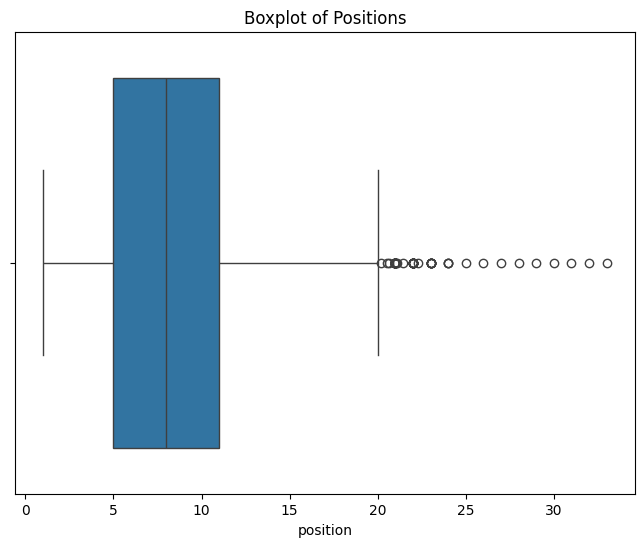

In [28]:
import seaborn as sns

# Create a boxplot to visualize outliers in the 'position' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=df_results['position'])
plt.title('Boxplot of Positions')
plt.show()


In [ ]:
# Remove outliers (positions > 33, for example, or any other threshold you want)
df_cleaned = df_results[df_results['position'] <= 33]
print(df_cleaned[['raceId', 'driverId', 'position']])


In [ ]:
# Replace outliers with the median position value
median_position = df_results['position'].median()
df_results['position'] = df_results['position'].apply(lambda x: median_position if x > 33 else x)


In [ ]:
# Replace position 33 with NaN
df_results['position'] = df_results['position'].replace(33, pd.NA)

# Or, replace with the median or other value
df_results['position'] = df_results['position'].replace(33, median_position)
